In [1]:
'''
First, define the environment. In this example, we are only using price data to initialize our state space
'''
from tradingtensors.Environments.CustomEnvs import OandaEnv

env = OandaEnv(
    INSTRUMENT = "EUR_USD", 
    granularity = "H1", 
    lookback_period= 3, #Using the previous 3 Hourly Return, Default= '(Open-LastOpen)/LastOpen'
    trade_duration=3 #Hold every trades for 3 hours
)

c:\users\sakiyama\appdata\local\programs\python\python35\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The finance module has been deprecated in mpl 2.0 and will be removed in mpl 2.2. Please use the module mpl_finance instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


In [2]:
'''
The Learning Agent -> DQN

Adjust hyperparameters and other model settings:
-> ./settings/DQNsettings
'''

from tradingtensors.Agents.Q_learning import DQNAgent

PATH = r'C:\pleiades\xampp\htdocs\TradingTensors\data'

agent = DQNAgent(
    env= env,
    directory = PATH, #Path to save your models
)

'''And the agent is ready for training'''

'And the agent is ready for training'

# Train/Test Mode

<img src='./images/AgentEnv.JPG'/>

In [3]:
'''
Two things are happening under the hood to improve the stability of DQN:
- Experience Replay: Sampling transition tuples (s, a, r, s') with equal probability during SGD. Experiences can be reused
- Target Network: Freeze the Online Network to improve bootstrapping of TD-Target
'''

agent.train(
    policy_measure = 'optimal', # either 'optimal', 'highest' or 'average'
    CONVERGENCE_THRESHOLD = 500, 
    EPISODES_TO_EXPLORE = 30,
    train_episodes = 100
)

End of Episode 1, Total Reward is -153.0, Average Reward is -1.821
Percentage of time spent on exploring (Random Action): 96 %
End of Episode 2, Total Reward is -2.29999999999, Average Reward is -0.026
Percentage of time spent on exploring (Random Action): 93 %
End of Episode 3, Total Reward is 207.1, Average Reward is 2.408
Percentage of time spent on exploring (Random Action): 90 %
End of Episode 4, Total Reward is 77.4, Average Reward is 0.956
Percentage of time spent on exploring (Random Action): 86 %
End of Episode 5, Total Reward is 3.20000000001, Average Reward is 0.036
Percentage of time spent on exploring (Random Action): 83 %
End of Episode 6, Total Reward is -71.1, Average Reward is -0.857
Percentage of time spent on exploring (Random Action): 80 %
End of Episode 7, Total Reward is -77.0, Average Reward is -0.885
Percentage of time spent on exploring (Random Action): 76 %
End of Episode 8, Total Reward is -158.6, Average Reward is -1.782
Percentage of time spent on exploring

End of Episode 51, Total Reward is -225.6, Average Reward is -2.593
Percentage of time spent on exploring (Random Action): 2 %
End of Episode 52, Total Reward is 30.5, Average Reward is 0.343
Percentage of time spent on exploring (Random Action): 2 %
End of Episode 53, Total Reward is 299.4, Average Reward is 3.290
Percentage of time spent on exploring (Random Action): 2 %
INFO:tensorflow:C:\pleiades\xampp\htdocs\TradingTensors\data\1958_Episode53.ckpt is not in all_model_checkpoint_paths. Manually adding it.
End of Episode 54, Total Reward is 240.9, Average Reward is 2.618
Percentage of time spent on exploring (Random Action): 2 %
INFO:tensorflow:C:\pleiades\xampp\htdocs\TradingTensors\data\1958_Episode54.ckpt is not in all_model_checkpoint_paths. Manually adding it.
End of Episode 55, Total Reward is 278.1, Average Reward is 2.927
Percentage of time spent on exploring (Random Action): 2 %
INFO:tensorflow:C:\pleiades\xampp\htdocs\TradingTensors\data\1958_Episode55.ckpt is not in all_m

End of Episode 100, Total Reward is -26.0, Average Reward is -0.292
Percentage of time spent on exploring (Random Action): 2 %


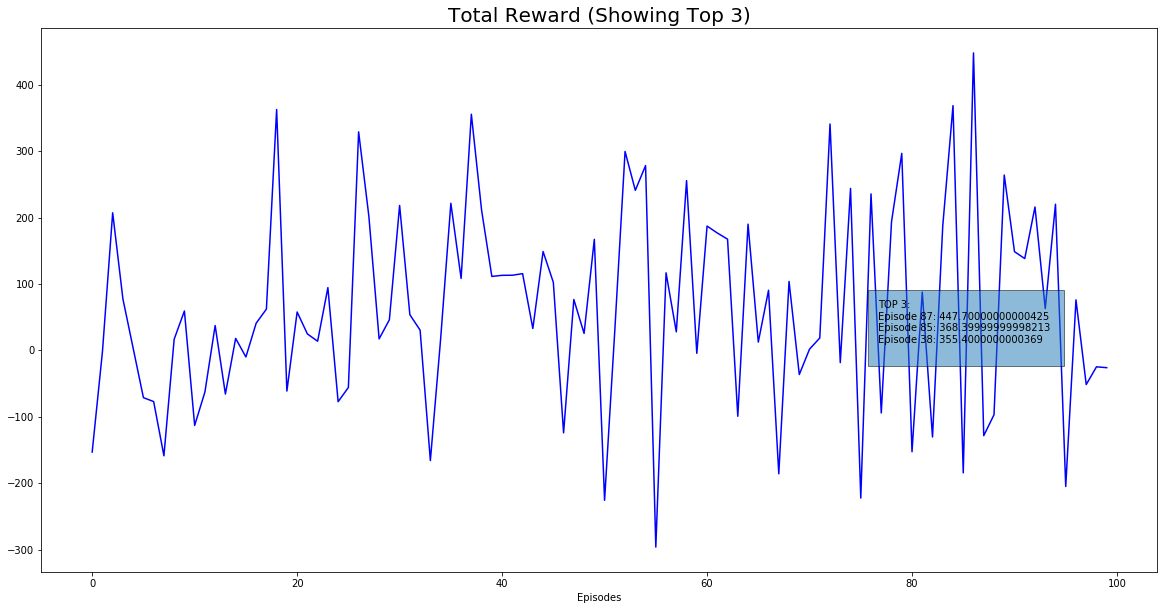

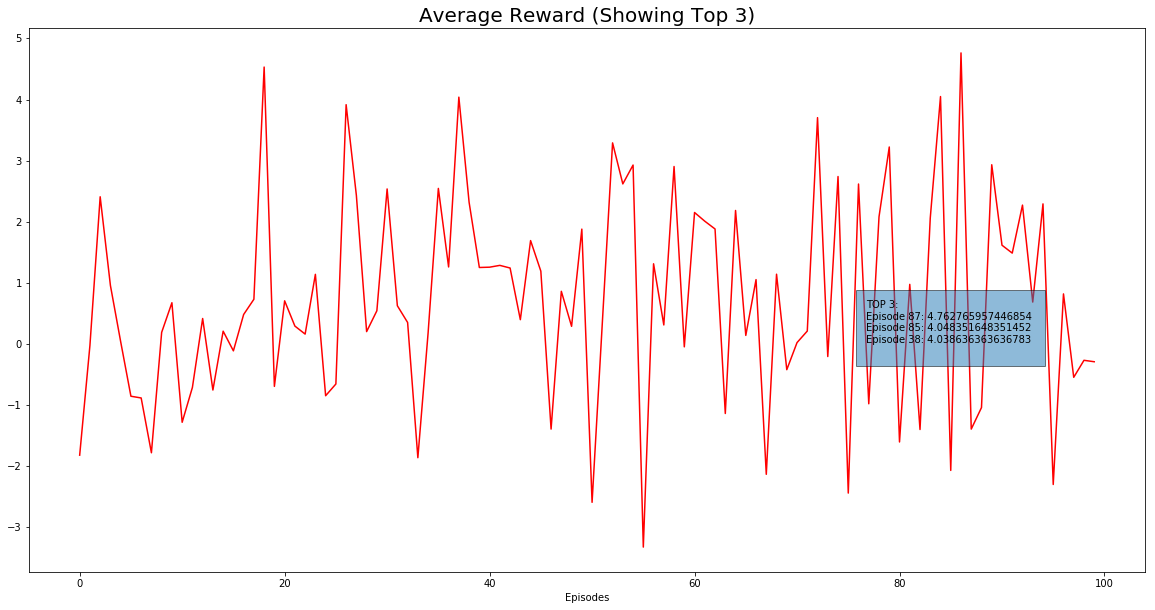

########   RANK 1   ###########
Episode          | 87
Total Reward     | 447.70
Average Reward   | 4.76
########   RANK 2   ###########
Episode          | 85
Total Reward     | 368.40
Average Reward   | 4.05
########   RANK 3   ###########
Episode          | 38
Total Reward     | 355.40
Average Reward   | 4.04
########   RANK 4   ###########
Episode          | 73
Total Reward     | 340.70
Average Reward   | 3.70
########   RANK 5   ###########
Episode          | 53
Total Reward     | 299.40
Average Reward   | 3.29
########   RANK 6   ###########
Episode          | 80
Total Reward     | 296.50
Average Reward   | 3.22
########   RANK 7   ###########
Episode          | 55
Total Reward     | 278.10
Average Reward   | 2.93
########   RANK 8   ###########
Episode          | 90
Total Reward     | 263.90
Average Reward   | 2.93
########   RANK 9   ###########
Episode          | 59
Total Reward     | 255.50
Average Reward   | 2.90
########   RANK 10   ###########
Episode          | 75
Total Rew

In [4]:
agent.trainSummary()

Summary Statistics for Episode 87 

Total Trades            | 94        (Buy)45       (Sell)49 
Profit (in pips)        | 447.70   (Buy)127.00   (Sell)320.70
Win Ratio               | 62.77%    (Buy)62.22%   (Sell)63.27 %
Average Trade Duration  | 2.98


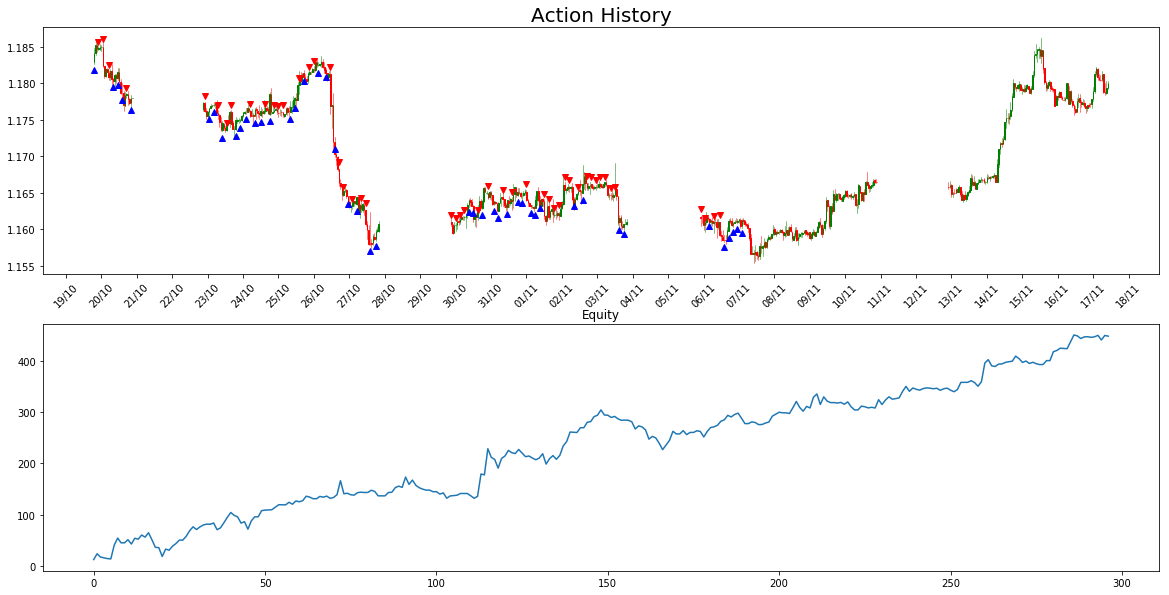

In [7]:
'''Pick a model from a particular episode and test the model on unseen data'''
BEST_EPISODE = 87
agent.episodeReview(BEST_EPISODE)

INFO:tensorflow:Restoring parameters from C:\pleiades\xampp\htdocs\TradingTensors\data\1958_Episode87.ckpt
Summary Statistics for Episode 0 

Total Trades            | 65        (Buy)40       (Sell)25 
Profit (in pips)        | 105.50   (Buy)150.40   (Sell)-44.90
Win Ratio               | 53.85%    (Buy)57.50%   (Sell)48.00 %
Average Trade Duration  | 3.00


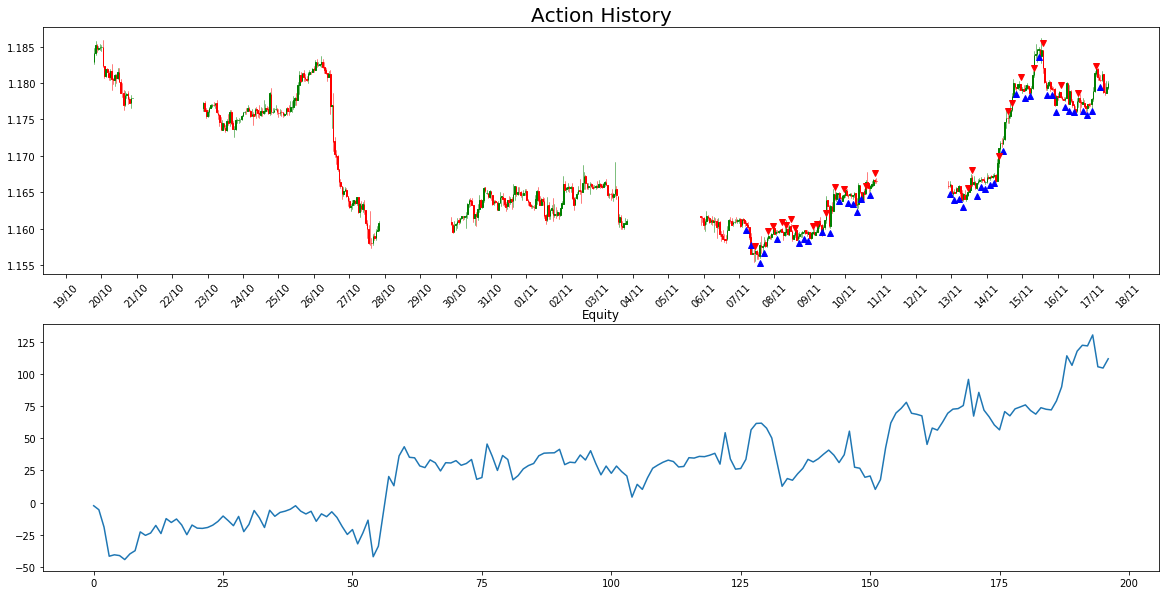

In [8]:
'''Testing!'''

agent.test(BEST_EPISODE)

# Live Trading

When you feel ready, pick this model and go live!

In [ ]:
'''
Under the hood:
2 threads running, one to 'listen' to new candle events, and another to process the new candle and execute trade
Note: Normalize new data set with train_set mean and std


agent.liveTrading(
    MODEL_EPS = 45 #Select the Model # (Training episode)
)
'''

In [ ]:
'''
from tradingtensors.Environments.CustomEnvs import OandaEnv

env = OandaEnv(
    INSTRUMENT = "EUR_USD", 
    TIMEFRAME = "H1", 
    lookback_period= 3, #Using the previous 3 Hourly Return, Default= '(Open-LastOpen)/LastOpen'
    trade_duration=3 #Hold every trades for 3 hours
)

from tradingtensors.Agents.Q_learning import DQNAgent

PATH = r'C:\Users\Henry\Documents\Python Stuff\Upwork Trial\Forex Ai\github\MODELS'

agent = DQNAgent(
    env= env,
    PARENT_PATH = PATH, #Path to save your models
    hidden_layers=[128, 64, 32]
)
agent.train(
    policy_measure = 'optimal', # either 'optimal', 'highest' or 'average'
    CONVERGENCE_THRESHOLD = 500, 
    EPISODES_TO_EXPLORE = 30,
    train_episodes = 200
)

agent.trainSummary()
'''